# Figure 2

Load librairies

In [19]:
import numpy as np                  # Data    
import pandas as pd                 # Data
import matplotlib.pyplot as plt     # Plot

Use Latex font

In [20]:
plt.rcParams.update({"text.usetex": True,
                     "font.family": "serif",
                     "font.serif": ["Computer Modern"],
                     "font.size": 11,
                     "axes.labelsize": 11,
                     "legend.fontsize": 11,
                     "xtick.labelsize": 9,
                     "ytick.labelsize": 9})  

## Data & Methods

Read capacity factor verification data from 2014 to 2023

In [21]:
df_cf = pd.read_csv('../Data/cf_verification_2014-2023.csv',
                    index_col = 0,
                    parse_dates = True)

Separate wind and solar PV CF

In [22]:
df_cf_wind = df_cf[['Wind OBS', 'Wind ATL', 'Wind C3S GRD', 'Wind C3S NAT']].dropna()
df_cf_solar = df_cf[['Solar OBS', 'Solar ATL', 'Solar C3S GRD', 'Solar C3S NAT']].dropna()

Select only 2023 data for solar PV

In [23]:
df_cf_solar = df_cf_solar.loc['2023']

Compute Median, Q1 and Q3

In [24]:
wind_stats = np.percentile(df_cf_wind, [25, 50, 75], axis = 0)
solar_stats = np.percentile(df_cf_solar, [25, 50, 75], axis = 0)

## Plot

In [25]:
color_models = ['dimgray', '#B03024', '#348ABD', '#988ED5']
label_name = ['OBS', 'ATL', 'C3S GRD', 'C3S NAT']

box_width = 0.2

cm = 1 / 2.54

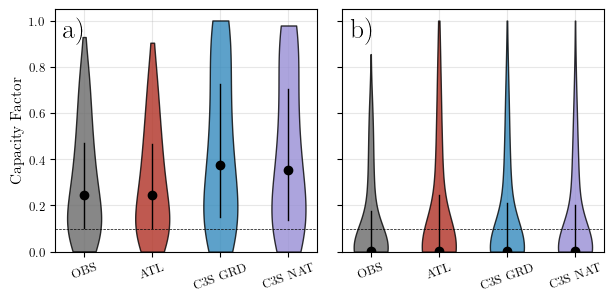

In [26]:
fig, ax = plt.subplots(1, 2,
                       figsize = (16*cm, 8*cm),
                       sharey = True)

# Violin plots
violins_wind = ax[0].violinplot(df_cf_wind,
                                showmeans = False,
                                showmedians = False,
                                showextrema = False,
                                bw_method = 0.5)

violins_solar = ax[1].violinplot(df_cf_solar,
                                 showmeans = False,
                                 showmedians = False,
                                 showextrema = False,
                                 bw_method = 0.5)

# Plot Median and InterQuartile Range
for i in range(len(label_name)):
    ax[0].plot([i+1, i+1],
               [wind_stats[0, i], wind_stats[2, i]],
               color = 'black',
               lw = 1,
               zorder = 3)
    ax[0].scatter(i+1,
                  wind_stats[1, i],
                  color = 'black',
                  zorder = 3) 

    ax[1].plot([i+1, i+1], 
               [solar_stats[0, i], solar_stats[2, i]], 
               color = 'black',
               lw = 1,
               zorder = 3)
    ax[1].scatter(i+1,
                  solar_stats[1, i],
                  color = 'black',
                  zorder = 3)

# Horizontal Line
ax[0].axhline(0.1,
              color = 'k',
              linestyle = '--',
              lw = 0.5,
              zorder = 4)
ax[1].axhline(0.1,
              color = 'k',
              linestyle = '--',
              lw = 0.5,
              zorder = 4)

# Violin properties
for i, (ele_wind, ele_solar) in enumerate(zip(violins_wind['bodies'], violins_solar['bodies'])):
    ele_wind.set_facecolor(color_models[i % len(color_models)])
    ele_wind.set_edgecolor('black')
    ele_wind.set_alpha(0.8)
    ele_wind.set_zorder(2)
    ele_solar.set_facecolor(color_models[i % len(color_models)])
    ele_solar.set_edgecolor('black')
    ele_solar.set_alpha(0.8)
    ele_solar.set_zorder(2)

# Axis properties
for i in range(2):
    # X-axis
    ax[i].set_xticks(range(1, len(label_name) + 1))
    ax[i].set_xticklabels([], rotation = 20)
    ax[i].set_xticklabels(label_name)

    # Y-axis
    ax[i].set_ylim(0, 1.05)
    if i == 0:
        ax[i].set_ylabel("Capacity Factor")

    # Grid
    ax[i].grid(True, alpha = 0.3, zorder = 0)

# Labels
ax[0].text(0.03, 0.97,
           'a)',
           fontsize = 20,
           ha = 'left', va = 'top',
           transform = ax[0].transAxes)
ax[1].text(0.03, 0.97,
           'b)',
           fontsize = 20,
           ha = 'left', va = 'top',
           transform = ax[1].transAxes)


fig.tight_layout()
# fig.savefig('2_verification_violin.pdf', bbox_inches = 'tight')